# Script examples

### Document description

This notebook iterates over the following list of scripts.
 1. First describing the major figure(s) produced, 
 2. Then showing a code snippet of how the figure is produced in python.

### List of scripts: 
* **AWS_series.py**: Compare AWS weather data to model output (interpolated to matching lat/lon)
	- df_time_series: take dataframe and plot time series
	- summary_wagerup: run df_time_series to plot wagerup AWS
	- compare_site_to_model: run df_time_series on combined AWS and model output
* **cloud_outline.py**: horizontal winds and theta transects with cloud contours
	- clouds_2panel: plot transects of rel humidity and water/ice content
	- cloud_outline_model: run clouds_2panel on a model run for defined times
* **emberstorm.py**: theta and vertical motion transects zoomed in on escarpement
	- emberstorm: theta, horizontal winds transects
	- make_plots_emberstorm: run emberstorm for a model run
* **f160.py**: skew T log p plots for user’s choice of lat/lon interpolated from model
* **fireplan.py**: fire spread using hourly contours on satellite image background, firepower vs pft time series, fire speed and intensity summary also
* **linescan_comparison.py**: compare sirivan linescan to modelled fire front
* maps.py: Show zoomed out maps of model runs, ie. nesting areas and context
* PFT_work.py: Calculate PFT, also plot PFT top-down map
* pyrocb.py: show transects, trying to focus on pyrocb occurrences
	- pyrocb_model_run: low level vert motion top down view + 3 transects
	- moving_pyrocb: vert motion transect that is moving over each time step (manually created)
* run_comparison.py: vertically binned wind and cloud comparisons between two model runs
	- compare_winds: bin-mean horizontal/vertical winds compared up to upper trop
	- compare_clouds: bin-max cloud content up to strat
* vert_motion_slices.py: Plot top-down views of vertical motion at various altitudes
	- vert_motion_slice: method that creates 4x4 plots of input data
	- vert_motion_hour: run vert_motion_slice on an hour of output from a model run
* weather_summary.py: Plot vertical and horizontal winds in vertical bins up to 10km
	- plot_weather_summary: winds + clouds in 4 averaged bins up to 10km
	- weather_summary_model: run plot_weather_summary for input times/model/extent
* wind_outline.py: top down and transect views of vert and horizontal winds
	- wind_outline: creates the figure
	- outline_model_winds: run wind_outline for an hour of output from one model run
* wind_vectors.py: Not really working too well – this script attempts to view wind vectors in 3D


## Setup

1. Import plotting and project modules
2. Implement jupyter notebook magic commands to make plots appear here
3. Example file reading and information output


In [1]:
###
###  Imports and globally useful stuff here
###
# Show plots in the browser
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.colors as col
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
#from matplotlib.colors import Normalize
import numpy as np
from datetime import datetime,timedelta

# Display an image from file using Image(filename='test.png') 
from IPython.display import Image
import matplotlib.image as mpimg

# iris cube manipulation and quick 2d plots
import iris
import iris.quickplot as qplt

# project modules I use for fio and other stuff
from utilities import plotting, utils, fio

In [4]:
##
## READ WAROONA MODEL DATA INTO IRIS CUBES:
##

dt = datetime(2016,1,5,15) # first hour of model output
model_run = 'waroona_run1'
extent = plotting._extents_['waroona']
model_cubes = fio.read_model_run(model_run, 
                                 fdtime=dt,
                                 extent=extent, 
                                 add_winds=True, 
                                 add_theta=True)

# extracting rom cubelist always returns cubelist
w, = model_cubes.extract('upward_air_velocity')

##
## READ FIREFRONT MODEL OUTPUT:
##
# pull datetime list from w
f_dtimes = utils.dates_from_iris(w)
ff = fio.read_fire(model_run,
                   dtimes=f_dtimes, 
                   extent=extent, 
                   firefront=True)

print("====== cubes ======")
print(model_cubes[:5])
print('...')

print('====== fire front cubes ======')
print(ff)


INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run1/fire/firefront.CSIRO_24h.20160105T1500Z.nc
====== cubes ======
0: air_pressure / (Pa)                 (time: 2; model_level_number: 140; latitude: 125; longitude: 152)
1: air_pressure_at_sea_level / (Pa)    (time: 2; latitude: 125; longitude: 152)
2: air_pressure_rho / (Pa)             (time: 2; model_level_number: 140; latitude: 125; longitude: 152)
3: air_temperature / (K)               (time: 2; model_level_number: 140; latitude: 125; longitude: 152)
4: mass_fraction_of_cloud_ice_in_air / (kg kg-1) (time: 2; model_level_number: 140; latitude: 125; longitude: 152)
...
====== fire front cubes ======
0: firefront / (1)   

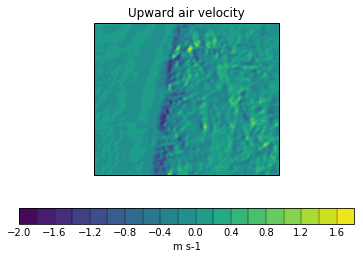

In [5]:
## Sample plot
# show vertical motion at last time step on 5th model level
qplt.contourf(w[-1,4], 20)


## AWS Time series

This script uses pandas and dictionaries to create multiple time series vertically aligned for clarity. 

#### summary_wagerup shows time series from AWS at wagerup
<img src="figures/measurements/AWS/summary_wagerup.png" alt="Wagerup" style="width: 500px;"/>

#### compare_site_to_model adds model output
Model output is interpolated to the same latitude and longitude as the weather station, and is shown in colour. model output is interpolated to 1, 10, and 30 metres (where appropriate) and shown with a downward arrow, dot, and upward arrow respectively.

<img src="figures/waroona_run2/AWS/wagerup_waroona_run2_all.png" alt="Wagerup vs run2" style="width: 800px;"/>

In [9]:
# import the script
import AWS_series

# start and end of time series plots
d0,dN = datetime(2016,1,4,10), datetime(2016,1,7,10)

# summary_wagerup just shows the wagerup weather station outputs
AWS_series.summary_wagerup(d0,dN,UTC=False);

# compare waroona_run2 to wagerup
_,_ = AWS_series.compare_site_to_model(AWS='wagerup', model_run='waroona_run2',
    showrange=[datetime(2016,1,5,6),datetime(2016,1,7,6)],
    UTC=False);


INFO: Saving figure: figures/measurements/AWS/summary_wagerup.png
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010516_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010516_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010516_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010516_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010517_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010517_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010517_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010517_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010518_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010518_mdl_ro1.n

## Cloud outline

#### cloud_outline_model 
provides a long transect showing clouds and theta.

Panel 1: top-down view of horizontal winds, with quivers.

Panel 2: potential temperature along transect shown in panel 1, including outline showing cloud threshold of 0.1 g/kg.

Panel 3: cloud (ice plus water) content along transect.

<img src="figures/waroona_run2/cloud_outline/transect_1/fig_201601061010.png" alt="cloud outline" style="width: 700px;"/>


In [2]:
import cloud_outline

# Create figures for run2, for one hour of output, at given transects
cloud_outline.cloud_outline_model(model_run='waroona_run2',dtime=datetime(2016,1,6,10))

INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc
INFO: Saving figure: figures/waroona_run2/cloud_outline/transect_1/fig_201601061010.png
INFO: Saving figure: figures/waroona_run2/cloud_outline/transect_2/fig_201601061010.png
INFO: Saving figure: figures/waroona_run2/cloud_outline/transect_3/fig_201601061010.png
INFO: Saving figure: figures/waroona_run2/cloud_outline/transect_4/fig_201601061010.png
INFO: Saving figure: figures/waroona_run2/cloud_outline/transect_5/fig_201601061010.png
INFO: 

## Emberstorm

#### make_plots_emberstorm 

Panel 1: Top-down view of topography, overlaid with surface wind quivers and 300m altitude contours showing vertical motion (pink is upwards). Dashed line shows transect for following panels (with blue markers showing transect end-points in other figures).

Panel 2: Potential temperature along transect shown in panel 1, with contours at each degree, and a marker showing the westernmost fire front and coloured topography showing the intersecting fire front (brown is negative fire front model output).

Panel 3: vertical motion and transectional wind quivers.

<img src="figures/waroona_run2/emberstorm/transect1/fig_201601061340.png" alt="emberstorm" style="width: 700px;"/>



In [7]:
import emberstorm

emberstorm.make_plots_emberstorm('waroona_run2',hours=[datetime(2016,1,6,12)])

INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010612_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010612_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010612_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010612_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc
INFO: Saving figure: figures/waroona_run2/emberstorm/transect0/fig_201601061210.png
INFO: Saving figure: figures/waroona_run2/emberstorm/transect1/fig_201601061210.png
INFO: Saving figure: figures/waroona_run2/emberstorm/transect2/fig_201601061210.png
INFO: Saving figure: figures/waroona_run2/emberstorm/transect3/fig_201601061210.png
INFO: Saving figure: figures/waroona_run2/emberstorm/transect4/fig_201601061210.png
INFO: Saving figure: figur

## f160

#### f160_hour
f160 over an hour of model output at given lat/lon

Skew T log P plot for a given location (see code). Modelled temperature and dewpoint temperature are shown.
<img src="figures/waroona_run2/F160/pyrocb1/fig_201601061010.png" alt="f160" style="width: 700px;"/>

In [2]:
import f160

f160.f160_hour(dtime=datetime(2016,1,6,10),
              latlon=plotting._latlons_['pyrocb_waroona1'],
              latlon_stamp='pyrocb1',
              model_version='waroona_run2')


INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010610_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Creating folder: figures/waroona_run2/F160/pyrocb1/
INFO: Saving figure: figures/waroona_run2/F160/pyrocb1/fig_201601061010.png
INFO: Saving figure: figures/waroona_run2/F160/pyrocb1/fig_201601061040.png


## fireplan

#### fireplan
shows fire spread over time
uses tiff file in data folder as background
<img src="figures/waroona_run2/fireplan/fireplan.png" alt="Fire front over time" style="width: 800px;"/>


#### fireplan_summary
also shows intensity and speed of fire


In [4]:
import fireplan

mr='waroona_run2'
extent = plotting._extents_['waroonaz']  # zoomed waroona extent
# read all the fire data
ff, = fio.read_fire(model_run=mr, dtimes=None,
                    extent=extent, firefront=True)

# first plot just the fireplan on it's own
fig,ax,proj = fireplan.fireplan(ff, show_cbar=True, cbar_XYWH=[.18,.24,.2,.02])
fio.save_fig(mr, 'fireplan', 'fireplan.png', plt)

# Now run summary figures
#fireplan.fireplan_summary(model_run=mr)
# needs both files to be within the data directory

INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc


/home/jesse/anaconda3/envs/BOMenv/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7f0de7e8aba0> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


INFO: Saving figure: figures/waroona_run2/fireplan/fireplan.png


## linescan_comparison
compare Sir Ivan fire spread to available linescan data
 * linescans are only available on the work desktop, as they are privately owned

#### linescan_vs_firefront


In [ ]:
import linescan_comparison

linescan_comparison.linescan_vs_firefront()

## maps

#### outline_waroona
Currently the tiff I'm using doesn't show the whole synoptic view

<img src="figures/waroona_outline.png" style="width: 800px;"/>

#### show_nests
shows synoptic view with model run nests
<img src="figures/waroona_run2/maps/nested_grid.png" style="width: 800px;"/>


In [2]:

import maps

maps.outline_waroona()

for mr in ['sirivan_run1','waroona_run2']:
    maps.show_nests(mr)

INFO: Reading(iris)  data/waroona_old/umnsaa_pa2016010515.nc


/home/jesse/anaconda3/envs/BOMenv/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7ff39f37a620> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))
/home/jesse/anaconda3/envs/BOMenv/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7ff39c175e60> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


INFO: Saving figure: figures/waroona_outline.png
INFO: Saving figure: figures/sirivan_run1/maps/nested_grid.png
INFO: Creating folder: figures/waroona_run2/maps/
INFO: Saving figure: figures/waroona_run2/maps/nested_grid.png


## PFT_work
* This script requires data files to have been created by make_pft_files.py
* make_pft_files.py will only work on a computer with the ported fortran code, which is not part of the github project (proprietary)

#### firepower_comparison
Modelled firepower is calculated by multiplying the sensible heat (W/m2) by the area, while PFT is calculated for a single column using ~ 1 km upwind from the ignition
<img src="figures/waroona_run1/PFT_work/comparison/firepower.png" style="width: 800px;"/>

#### model_run_PFT_summary
A map of the model PFT is shown overlaid with averaged winds below 500 m altitude.
<img src="figures/waroona_old/PFT_work/fig_201601051531.png" style="width: 800px;"/>

In [6]:
import PFT_work

## compare one or more runs firepower outputs with PFT
PFT_work.firepower_comparison(runs=['waroona_old','waroona_run1'])
    
## Summary figure for PFT at a site for one output hour
PFT_work.model_run_PFT_summary(model_run='waroona_old', hour=datetime(2016,1,5,15))


INFO: Reading(iris)  data/waroona_old/fire/sensible_heat.01.nc


/home/jesse/anaconda3/envs/BOMenv/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


INFO: Reading(iris)  data/waroona_run1/fire/sensible_heat.CSIRO_24h.20160105T1500Z.nc


/home/jesse/anaconda3/envs/BOMenv/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


INFO: Saving figure: figures/waroona_run1/PFT_work/comparison/firepower.png
INFO: Reading(iris)  data/waroona_old/umnsaa_pc2016010515.nc
INFO: Reading(iris)  data/waroona_old/umnsaa_pa2016010515.nc
INFO: Reading(iris)  data/waroona_old/fire/firefront.01.nc
INFO: Saving figure: figures/waroona_old/PFT_work/fig_201601051501.png
INFO: Saving figure: figures/waroona_old/PFT_work/fig_201601051531.png


## pyrocb
* subset flag is for if the local data is my 'subset_for_laptop'

#### moving_pyrocb
transect showing vertical motion and potential temperature, transect has been manually positioned for each time step of the output.
Figure below shows a sample for waroona_run3:
<img src="figures/waroona_run3/pyrocb/moving/fig_201601060710.png" style="width: 800px;"/>

#### pyrocb_model_run
three vertical motion transects positioned to show pyrocb.
Figure below shows sample for waroona_run1:
<img src="figures/waroona_run1/pyrocb/fig_201601061010.png" style="width: 800px;"/>

In [4]:
import pyrocb

pyrocb.moving_pyrocb(model_run='waroona_run3', hours=[datetime(2016,1,6,7)])
    
# Run sample for waroona_run2
pyrocb.pyrocb_model_run('waroona_run1', dtime=datetime(2016,1,6,10))


INFO: Reading(iris)  data/waroona_run3/umnsaa_2016010607_slv.nc
INFO: Reading(iris)  data/waroona_run3/umnsaa_2016010607_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run3/umnsaa_2016010607_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run3/umnsaa_2016010607_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run3/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run3/fire/firefront.CSIRO_new_gadi.20160105T1500Z.nc
INFO: Saving figure: figures/waroona_run3/pyrocb/moving/fig_201601060710.png
INFO: Saving figure: figures/waroona_run3/pyrocb/moving/fig_201601060740.png
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010610_slv.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010610_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010610_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010610_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run1/umnsaa_2016010515_mdl_th1.nc
INFO: Reading(iris)  da

## run_comparison
Compare vertically binned output between 2 model runs

#### compare_winds
horizontal and vertical winds are compared separately.

Rows 1 and 2 show vertically averaged wind speeds binned by altitude. Columns from left to right look at increasing altitudes.
Row 3 (and 4) shows the distribution of wind speed (and direction) for both runs.

1. **Horizontal**: 
<img src="figures/waroona_run2/run_comparison/horizontal/fig_201601061110.png" style="width: 800px;"/>

2. **Vertical**:

<img src="figures/waroona_run2/run_comparison/vertical/fig_201601061110.png" style="width: 800px;"/>

#### compare_clouds
Compare maximum cloud content within vertical bins between two model runs.
<img src="figures/waroona_run2/run_comparison/clouds/fig_201601061110.png" />

In [5]:
import run_comparison
run_comparison.compare_winds(
    mr1='waroona_run2',
    mr2='waroona_run2uc',
    hour=datetime(2016,1,6,11))

run_comparison.compare_clouds(
    mr1='waroona_run2', 
    mr2='waroona_run2uc', 
    hour=datetime(2016,1,6,11))


INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010611_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010611_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010611_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010611_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2uc/umnsaa_2016010611_slv.nc
INFO: Reading(iris)  data/waroona_run2uc/umnsaa_2016010611_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2uc/umnsaa_2016010611_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2uc/umnsaa_2016010611_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2uc/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc
INFO: Reading(iris)  data/waroona_run2uc/fire/firefront.CSIRO_new_ncp.20160105T1500Z.nc


OSError: One or more of the files specified did not exist:
    * "C:\Users\jgreensl\Desktop\Repos\accessfires\data\waroona_run2uc\fire\firefront.CSIRO_new_ncp.20160105T1500Z.nc" didn't match any files

## vert_motion_slices

#### vert_motion_hour
Several model levels are extracted from model output and cloud content along with vertical motion are shown. Contours show .1g/kg ice and water content threshold for cloud.
<img src="figures/waroona_run2/vert_motion_slices/fig_201601060710.png" />


In [8]:
import vert_motion_slices
vert_motion_slices.vert_motion_hour(dtime=datetime(2016,1,6,7),model_run='waroona_run2')

INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc
INFO: Saving figure: figures/waroona_run2/vert_motion_slices/fig_201601060710.png
INFO: Saving figure: figures/waroona_run2/vert_motion_slices/fig_201601060740.png


## weather_summary

#### weather_summary_model
Vertically binned (averaged) horizontal and vertical winds and clouds are shown for a model run.
<img src="figures/waroona_run2/weather_summary/fig_201601060710.png">

In [9]:
import weather_summary

weather_summary.weather_summary_model(
    model_version='waroona_run2', 
    fdtimes=[datetime(2016,1,6,7)])

INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc
INFO: Saving figure: figures/waroona_run2/weather_summary/fig_201601060710.png
INFO: Saving figure: figures/waroona_run2/weather_summary/fig_201601060740.png


## wind_outline
Show several transects for model run horizontal and vertical winds.

#### outline_model_winds
Panel 1: top-down view of topography and surface winds.
Panel 2: vertical motion and a contour for the cloud threshold.
Panel 3: horizontal motion
<img src="figures/waroona_run2/wind_outline/transect_1/fig_201601060710.png" />

In [10]:
import wind_outline

wind_outline.outline_model_winds(
    'waroona_run2', 
    hours=[datetime(2016,1,6,7)])

INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_slv.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010607_mdl_th2.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_ro1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_mdl_th1.nc
INFO: Reading(iris)  data/waroona_run2/umnsaa_2016010515_slv.nc
INFO: Reading(iris)  data/waroona_run2/fire/firefront.CSIRO_24h_new.20160105T1500Z.nc
INFO: Creating folder: figures/waroona_run2/wind_outline/transect_1/
INFO: Saving figure: figures/waroona_run2/wind_outline/transect_1/fig_201601060710.png
INFO: Creating folder: figures/waroona_run2/wind_outline/transect_2/
INFO: Saving figure: figures/waroona_run2/wind_outline/transect_2/fig_201601060710.png
INFO: Creating folder: figures/waroona_run2/wind_outline/transect_3/
INFO: Saving figure: figures/waroona_run2/wind_outline/transect_3